In [1]:
import numpy as np
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import copy

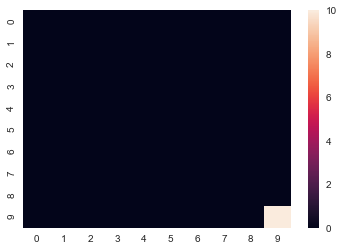

In [2]:
#Q1 Heat map RF1
rf1=np.zeros((10, 10))
rf1[9,9]=10
rf1

ax = sns.heatmap(rf1)

plt.show()

[[   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0 -100 -100 -100    0    0    0]
 [   0    0    0    0 -100    0 -100    0    0    0]
 [   0    0    0    0 -100    0 -100 -100 -100    0]
 [   0    0    0    0 -100    0    0    0 -100    0]
 [   0    0    0    0 -100    0    0    0 -100    0]
 [   0    0    0    0 -100    0    0    0 -100    0]
 [   0    0    0    0    0    0 -100 -100 -100    0]
 [   0    0    0    0    0    0 -100    0    0    0]
 [   0    0    0    0    0    0    0    0    0   10]]


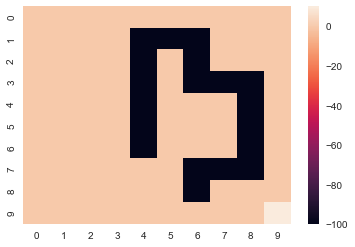

In [3]:
#Q1 Heat map RF2

#rf2=np.zeros((10, 10))


rf2=np.matrix([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
 [ 0,  0,  0,  0,  -100,  -100,  -100,  0,  0,  0],
 [ 0,  0,  0,  0,  -100,  0,  -100,  0,  0,  0],
 [ 0,  0,  0,  0,  -100,  0,  -100,  -100,  -100,  0],
 [ 0,  0,  0,  0,  -100,  0,  0,  0,  -100,  0],
 [ 0,  0,  0,  0,  -100,  0,  0,  0,  -100,  0],
 [ 0,  0,  0,  0,  -100,  0,  0,  0,  -100,  0],
 [ 0,  0,  0,  0,  0,  0,  -100,  -100,  -100,  0],
 [ 0,  0,  0,  0,  0,  0,  -100,  0,  0,  0],
 [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  10]])

print(rf2)
ax = sns.heatmap(rf2)

plt.show()

In [4]:
#state space
ss = np.zeros(shape=(10,10))
k=0
for i in range(0,10):
    for j in range(0,10):
        ss[j][i]=k
        k=k+1

#action set
action=("R","L","U","D")
gamma=0.8

In [5]:
ss

array([[  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90.],
       [  1.,  11.,  21.,  31.,  41.,  51.,  61.,  71.,  81.,  91.],
       [  2.,  12.,  22.,  32.,  42.,  52.,  62.,  72.,  82.,  92.],
       [  3.,  13.,  23.,  33.,  43.,  53.,  63.,  73.,  83.,  93.],
       [  4.,  14.,  24.,  34.,  44.,  54.,  64.,  74.,  84.,  94.],
       [  5.,  15.,  25.,  35.,  45.,  55.,  65.,  75.,  85.,  95.],
       [  6.,  16.,  26.,  36.,  46.,  56.,  66.,  76.,  86.,  96.],
       [  7.,  17.,  27.,  37.,  47.,  57.,  67.,  77.,  87.,  97.],
       [  8.,  18.,  28.,  38.,  48.,  58.,  68.,  78.,  88.,  98.],
       [  9.,  19.,  29.,  39.,  49.,  59.,  69.,  79.,  89.,  99.]])

In [6]:
right= np.zeros(shape=(100,100))
w=0.1
for i in range(0,100):
    if(i%10==0):
        right[i][i]+=w/4
    else:
        right[i][i-1]=w/4
    if(i-10<0):
        right[i][i]+=w/4
    else:
        right[i][i-10]=w/4
    if(i+10>99):
        right[i][i]+=w/4
    else:
        right[i][i+10]=1-w+w/4
    if((i+1)%10==0):
        right[i][i]+=w/4
    else:
        right[i][i+1]=w/4
    if(i+10>99):                      
        right[i][i]+=1-w

In [8]:
up= np.zeros(shape=(100,100))
w=0.1
for i in range(0,100):
    if(i%10==0):
        up[i][i]+=w/4
    else:
        up[i][i-1]=1-w+w/4
    if(i-10<0):
        up[i][i]+=w/4
    else:
        up[i][i-10]=w/4
    if(i+10>99):
        up[i][i]+=w/4
    else:
        up[i][i+10]=w/4
    if((i+1)%10==0):
        up[i][i]+=w/4
    else:
        up[i][i+1]=w/4
    if(i%10==0):                     
        up[i][i]+=1-w
    

In [9]:
left= np.zeros(shape=(100,100))
w=0.1
for i in range(0,100):
    if(i%10==0):
        left[i][i]+=w/4
    else:
        left[i][i-1]=w/4
    if(i-10<0):
        left[i][i]+=w/4
    else:
        left[i][i-10]=1-w+w/4
    if(i+10>99):
        left[i][i]+=w/4
    else:
        left[i][i+10]=w/4
    if((i+1)%10==0):
        left[i][i]+=w/4
    else:
        left[i][i+1]=w/4
    if(i-10<0):                      
        left[i][i]+=1-w
    

In [10]:
down= np.zeros(shape=(100,100))
w=0.1
for i in range(0,100):
    if(i%10==0):
        down[i][i]+=w/4
    else:
        down[i][i-1]=w/4
    if(i-10<0):
        down[i][i]+=w/4
    else:
        down[i][i-10]=w/4
    if(i+10>99):
        down[i][i]+=w/4
    else:
        down[i][i+10]=w/4
    if((i+1)%10==0):
        down[i][i]+=w/4
    else:
        down[i][i+1]=1-w+w/4
    if((i+1)%10==0):                      
        down[i][i]+=1-w
    

In [12]:
rf2

matrix([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
        [   0,    0,    0,    0, -100, -100, -100,    0,    0,    0],
        [   0,    0,    0,    0, -100,    0, -100,    0,    0,    0],
        [   0,    0,    0,    0, -100,    0, -100, -100, -100,    0],
        [   0,    0,    0,    0, -100,    0,    0,    0, -100,    0],
        [   0,    0,    0,    0, -100,    0,    0,    0, -100,    0],
        [   0,    0,    0,    0, -100,    0,    0,    0, -100,    0],
        [   0,    0,    0,    0,    0,    0, -100, -100, -100,    0],
        [   0,    0,    0,    0,    0,    0, -100,    0,    0,    0],
        [   0,    0,    0,    0,    0,    0,    0,    0,    0,   10]])

In [13]:
def optimal_value(ss,action,w,gamma,reward_func,right,left,up,down):
    v=np.zeros(100)
    delta=3
    r=np.asarray(np.transpose(reward_func)).reshape(-1)
    while(delta>0.01):
        delta=0
        v1=np.copy(v)
        for s in range(0,100):
            temp=v1[s]
            up_temp=np.sum(up[s]*(r+gamma*v1))
            down_temp=np.sum(down[s]*(r+gamma*v1))
            right_temp=np.sum(right[s]*(r+gamma*v1))
            left_temp=np.sum(left[s]*(r+gamma*v1))
            #print up_temp,"  ",down_temp,"  ",right_temp, "  ",left_temp
            v[s]=max(up_temp,down_temp,right_temp,left_temp)
            delta=max(delta,abs(temp-v[s]))
        #print delta
    return v
            
    

In [14]:
def optimal_policy(ss,action,w,gamma,reward_func,right,left,up,down):
    v=np.zeros(100)
    delta=float("inf")
    r=np.asarray(np.transpose(reward_func)).reshape(-1)
    policy=np.zeros(100)
    arrows=np.zeros(100) # ("R","L","U","D")
    while(delta>0.01):
        delta=0
        v1=copy.copy(v)
        for s in range(0,100):
            temp=v1[s]
            up_temp=np.sum(up[s]*(r+gamma*v1))
            down_temp=np.sum(down[s]*(r+gamma*v1))
            right_temp=np.sum(right[s]*(r+gamma*v1))
            left_temp=np.sum(left[s]*(r+gamma*v1))
            #print up_temp,"  ",down_temp,"  ",right_temp, "  ",left_temp
            v[s]=max(up_temp,down_temp,right_temp,left_temp)
            delta=max(delta,abs(temp-v[s]))
    for s in range(0,100):
        up_temp=np.sum(up[s]*(r+gamma*v))
        down_temp=np.sum(down[s]*(r+gamma*v))
        right_temp=np.sum(right[s]*(r+gamma*v))
        left_temp=np.sum(left[s]*(r+gamma*v))
        arr=[right_temp,left_temp,up_temp,down_temp]
        policy[s]=np.amax(arr)
        arrows[s]=arr.index(np.amax(arr))
    return policy,arrows
        
    

[[  0.74809645   0.95482534   1.22216134   1.5615223    1.99211705
    2.53840463   3.23138344   4.11032904   5.22501821   6.41164636]
 [  0.95482534   1.19311612   1.52949726   1.95884422   2.50598517
    3.20326637   4.09195305   5.22380989   6.6453692    8.186723  ]
 [  1.22216134   1.52949726   1.95709262   2.50448368   3.20218519
    4.09140937   5.224701     6.66804289   8.48669332  10.4991123 ]
 [  1.5615223    1.95884422   2.50448368   3.20213897   4.0913875
    5.22473135   6.66914563   8.5092347   10.83505096  13.46372514]
 [  1.99211705   2.50598517   3.20218519   4.0913875    5.22473144
    6.66917212   8.51009076  10.85579026  13.8288551   17.2638679 ]
 [  2.53840463   3.20326637   4.09140937   5.22473135   6.66917212
    8.51010261  10.85635605  13.84638043  17.64494026  22.1354511 ]
 [  3.23138344   4.09195305   5.224701     6.66914563   8.51009076
   10.85635605  13.84664791  17.65774808  22.5084073   28.38116324]
 [  4.11032904   5.22380989   6.66804289   8.5092347   1

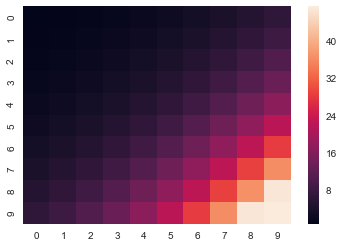

In [22]:
#Question 2 and 3
v=optimal_value(ss,action,w,gamma,rf1,right,left,up,down)
v_new=np.transpose(v.reshape(10,10))

print v_new
ax = sns.heatmap(v_new)

plt.show()

[[  6.46710402e-01   7.90798480e-01   8.20813046e-01   5.25100092e-01
   -2.38647637e+00  -4.23692968e+00  -1.92337440e+00   1.12809691e+00
    1.59116227e+00   2.03482701e+00]
 [  8.27724228e-01   1.01773259e+00   1.06157960e+00  -1.87921677e+00
   -6.75466905e+00  -8.68371372e+00  -6.37348342e+00  -1.29836115e+00
    1.92477470e+00   2.60689337e+00]
 [  1.06131226e+00   1.31300108e+00   1.44578824e+00  -1.63521080e+00
   -6.75775652e+00  -1.39166346e+01  -9.65320172e+00  -5.51481504e+00
   -1.34600438e-01   3.35547821e+00]
 [  1.35778625e+00   1.68918212e+00   1.94390703e+00  -1.24321750e+00
   -6.33921636e+00  -7.98277134e+00  -7.94729165e+00  -9.43445243e+00
   -1.91815510e+00   4.38704487e+00]
 [  1.73393379e+00   2.16807921e+00   2.58589509e+00  -7.36489716e-01
   -5.84672738e+00  -3.25840283e+00  -3.24107127e+00  -7.43449847e+00
    1.71515827e+00   9.15952421e+00]
 [  2.21111919e+00   2.77755323e+00   3.41334536e+00  -3.81397000e-02
   -5.11411173e+00  -5.53379765e-01  -4.87536

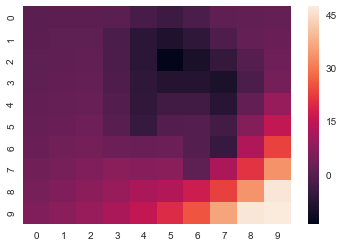

In [23]:
#Question 6 and 7
v1=optimal_value(ss,action,w,gamma,rf2,right,left,up,down)
v1_new=np.transpose(v1.reshape(10,10))

print v1_new
ax = sns.heatmap(v1_new)

plt.show()

[[  0.75559112   0.96232015   1.22965618   1.56901717   1.99961192
    2.54589951   3.23887832   4.11782392   5.23251308   6.41914124]
 [  0.96232015   1.20061093   1.53699212   1.96633909   2.51348004
    3.21076124   4.09944793   5.23130476   6.65286408   8.19421787]
 [  1.22965618   1.53699212   1.96458749   2.51197855   3.20968006
    4.09890425   5.23219587   6.67553776   8.4941882   10.50660718]
 [  1.56901717   1.96633909   2.51197855   3.20963385   4.09888237
    5.23222622   6.6766405    8.51672958  10.84254583  13.47122002]
 [  1.99961192   2.51348004   3.20968006   4.09888237   5.23222631
    6.676667     8.51758564  10.86328513  13.83634997  17.27136278]
 [  2.54589951   3.21076124   4.09890425   5.23222622   6.676667
    8.51759748  10.86385093  13.85387531  17.65243513  22.14294598]
 [  3.23887832   4.09944793   5.23219587   6.6766405    8.51758564
   10.86385093  13.85414278  17.66524295  22.51590217  28.38865811]
 [  4.11782392   5.23130476   6.67553776   8.51672958  10

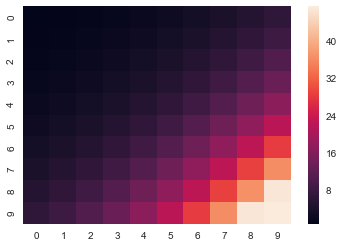

In [17]:
#optimal policy
v1,a1=optimal_policy(ss,action,w,gamma,rf1,right,left,up,down)
v1=np.transpose(v1.reshape(10,10))


print v1
print a1
ax = sns.heatmap(v1)

plt.show()

[[  6.54200314e-01   7.98288554e-01   8.28303133e-01   5.32589793e-01
   -2.37898743e+00  -4.22943945e+00  -1.91588403e+00   1.13558730e+00
    1.59865267e+00   2.04231742e+00]
 [  8.35214417e-01   1.02522284e+00   1.06906988e+00  -1.87172669e+00
   -6.74717934e+00  -8.67622370e+00  -6.36599305e+00  -1.29087075e+00
    1.93226511e+00   2.61438378e+00]
 [  1.06880257e+00   1.32049143e+00   1.45327860e+00  -1.62772052e+00
   -6.75026640e+00  -1.39091442e+01  -9.64571132e+00  -5.50732463e+00
   -1.27110030e-01   3.36296862e+00]
 [  1.36527662e+00   1.69667250e+00   1.95139743e+00  -1.23572713e+00
   -6.33172605e+00  -7.97528095e+00  -7.93980125e+00  -9.42696203e+00
   -1.91066469e+00   4.39453527e+00]
 [  1.74142418e+00   2.17556961e+00   2.59338550e+00  -7.28999322e-01
   -5.83923701e+00  -3.25091243e+00  -3.23358086e+00  -7.42700806e+00
    1.72264868e+00   9.16701462e+00]
 [  2.21860959e+00   2.78504364e+00   3.42083577e+00  -3.06492958e-02
   -5.10662133e+00  -5.45889357e-01  -4.80046

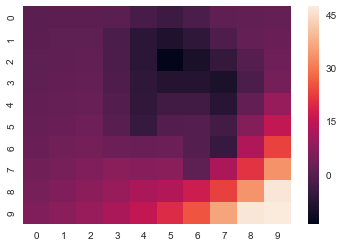

In [18]:
#optimal policy
v2,a2=optimal_policy(ss,action,w,gamma,rf2,right,left,up,down)
v2=np.transpose(v2.reshape(10,10))


print v2
print a2
ax = sns.heatmap(v2)

plt.show()

In [19]:
 # ("R","L","U","D")

def getarrows(a):
    #arrow=np.chararray(100)
    arrow = ["" for x in range(100)]
    for i in range(0,100):
        if( a[i]==0):
            arrow[i]=u'\u2192'
        elif(a[i]==1):
            arrow[i]=u'\u2190'
        elif(a[i]==2):
            arrow[i]=u'\u2191'
        elif(a[i]==3):
            arrow[i]=u'\u2193'
    #print arrow
    return arrow

In [20]:
#Question 5
print a1
ar1=getarrows(a1)
ar1=np.transpose(np.asarray(ar1).reshape(10,10))
for i in range(0,10):
    print reduce(lambda x,y : x+ "\t" + y,ar1[i])

[ 3.  3.  3.  3.  3.  3.  3.  3.  0.  0.  0.  0.  3.  3.  3.  3.  0.  0.
  0.  0.  0.  0.  0.  3.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.  0.  0.  3.  3.
  3.  0.  0.  0.  0.  0.  0.  3.  3.  3.  3.  3.  0.  0.  0.  0.  0.  3.
  3.  3.  3.  3.  3.  3.  0.  0.  3.  3.  3.  3.  3.  3.  3.  3.  0.  0.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  0.]
↓	→	→	→	→	→	→	→	↓	↓
↓	→	→	→	→	→	↓	↓	↓	↓
↓	↓	→	→	→	↓	↓	↓	↓	↓
↓	↓	↓	→	↓	↓	↓	↓	↓	↓
↓	↓	↓	→	→	↓	↓	↓	↓	↓
↓	↓	→	→	→	→	↓	↓	↓	↓
↓	→	→	→	→	→	→	↓	↓	↓
↓	→	→	→	→	→	→	↓	↓	↓
→	→	→	→	→	→	→	→	→	↓
→	→	→	→	→	→	→	→	→	→


In [21]:
#Question 9
print a2
ar2=getarrows(a2)
ar2=np.transpose(np.asarray(ar2).reshape(10,10))
for i in range(0,10):
    print reduce(lambda x,y : x+ "\t" + y,ar2[i])

[ 3.  3.  3.  3.  3.  3.  3.  3.  0.  0.  3.  3.  3.  3.  3.  3.  3.  3.
  0.  0.  3.  3.  3.  3.  3.  3.  3.  3.  0.  0.  1.  1.  1.  1.  1.  1.
  3.  3.  3.  0.  1.  1.  1.  1.  1.  1.  3.  3.  3.  0.  0.  2.  3.  3.
  3.  3.  3.  3.  3.  0.  0.  0.  0.  3.  3.  3.  1.  1.  3.  0.  0.  0.
  0.  2.  3.  1.  1.  3.  3.  0.  0.  0.  0.  0.  0.  0.  0.  3.  3.  0.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  0.]
↓	↓	↓	←	←	→	→	→	→	↓
↓	↓	↓	←	←	↑	→	→	→	↓
↓	↓	↓	←	←	↓	→	→	→	↓
↓	↓	↓	←	←	↓	↓	↑	→	↓
↓	↓	↓	←	←	↓	↓	↓	→	↓
↓	↓	↓	←	←	↓	↓	←	→	↓
↓	↓	↓	↓	↓	↓	←	←	→	↓
↓	↓	↓	↓	↓	↓	←	↓	↓	↓
→	→	→	↓	↓	↓	↓	↓	↓	↓
→	→	→	→	→	→	→	→	→	→
